In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import tensorflow as tf
import keras

import sys
import os
import sklearn

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

In [2]:
train = pd.read_csv('train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
test = pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


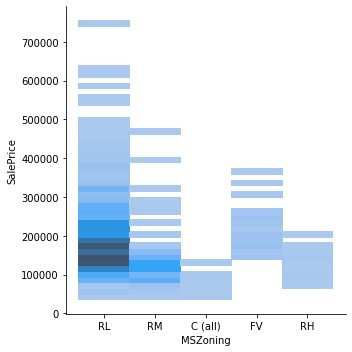

In [7]:
data = [train, test]

sns.displot(data = train, x = 'MSZoning', y = 'SalePrice')

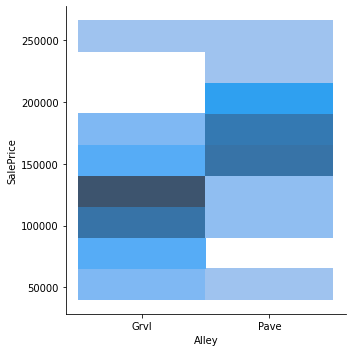

In [8]:
sns.displot(data = train, x = 'Alley', y = 'SalePrice')

In [9]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

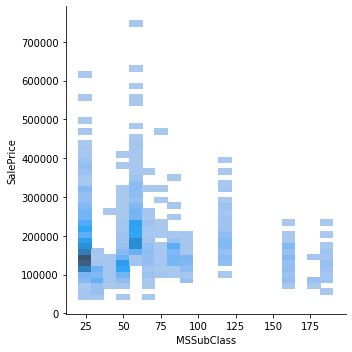

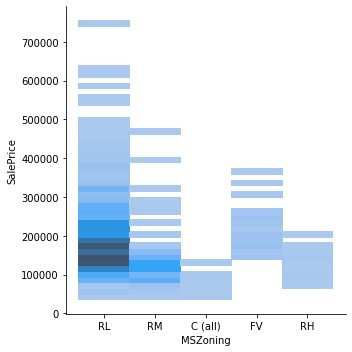

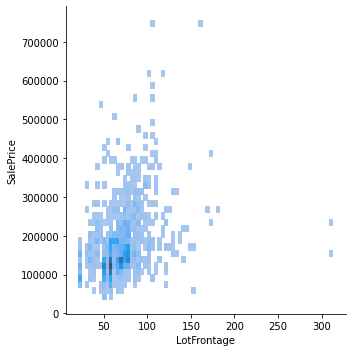

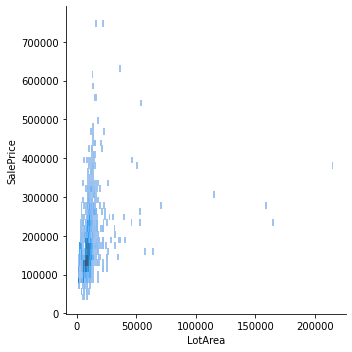

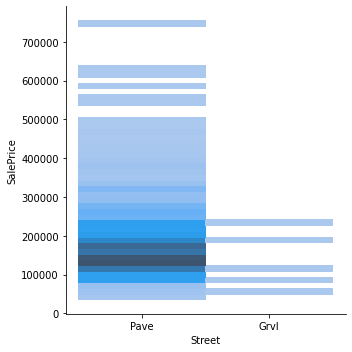

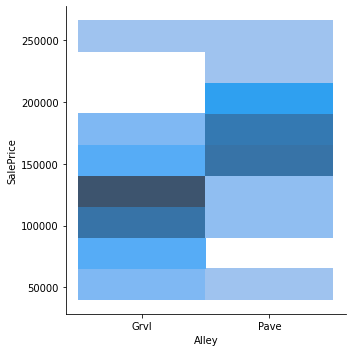

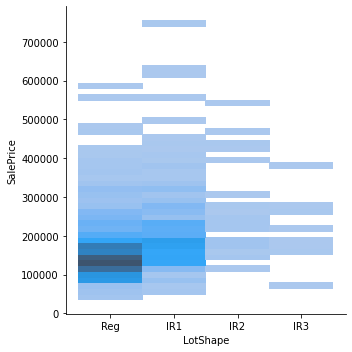

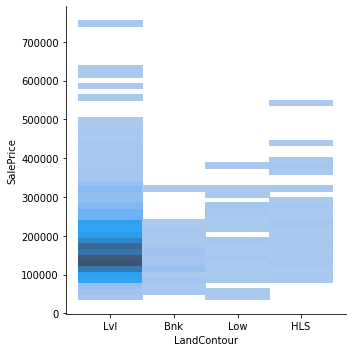

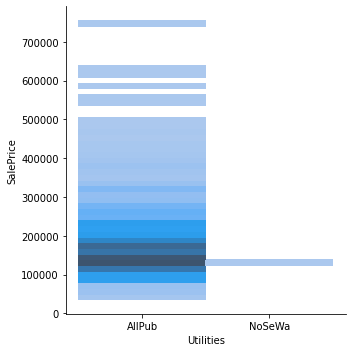

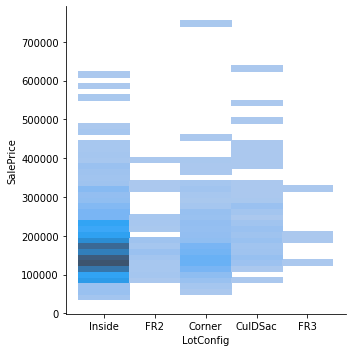

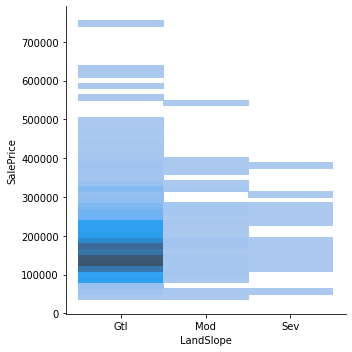

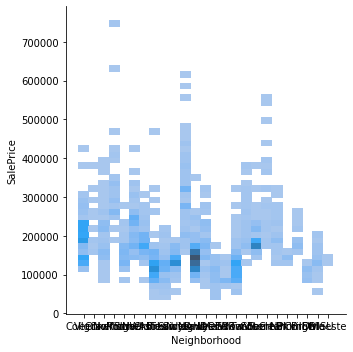

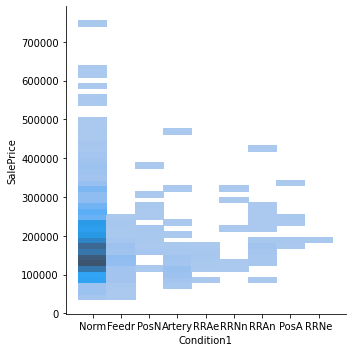

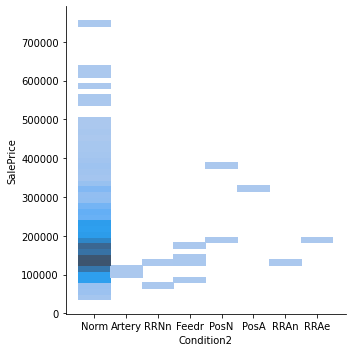

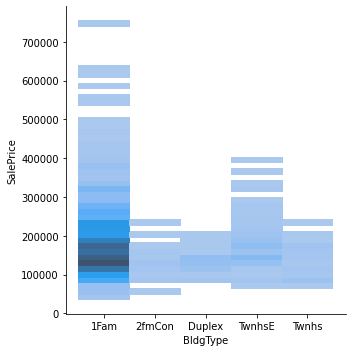

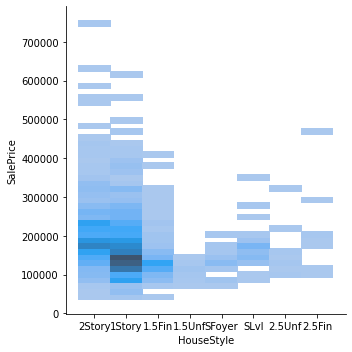

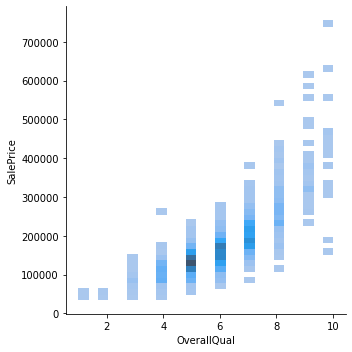

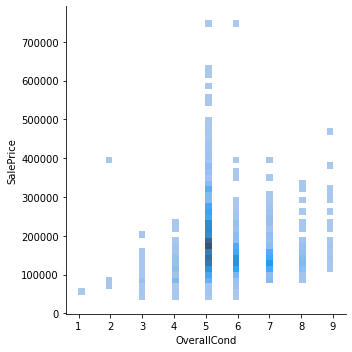

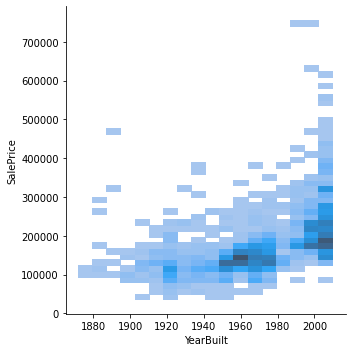

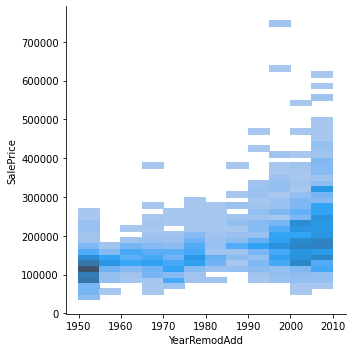

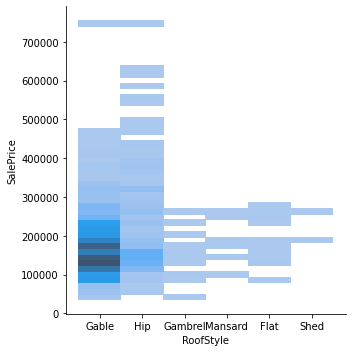

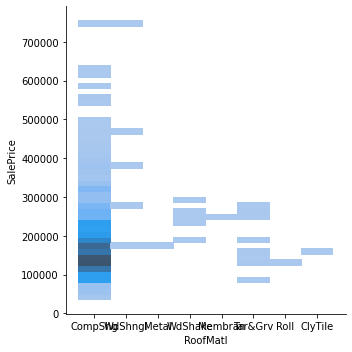

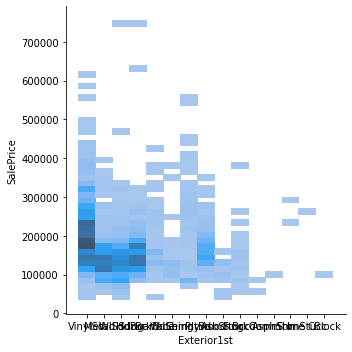

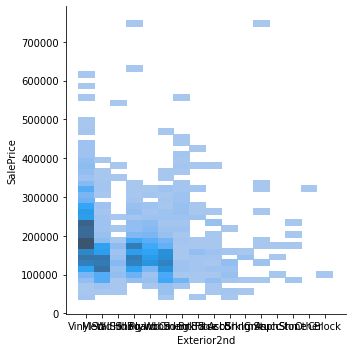

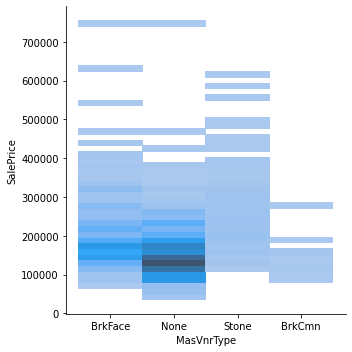

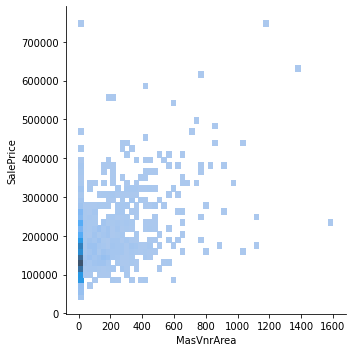

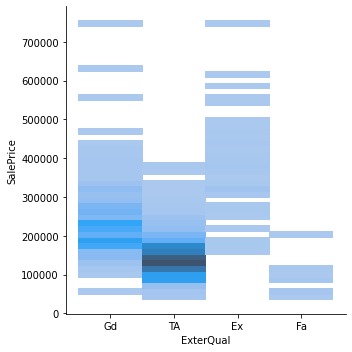

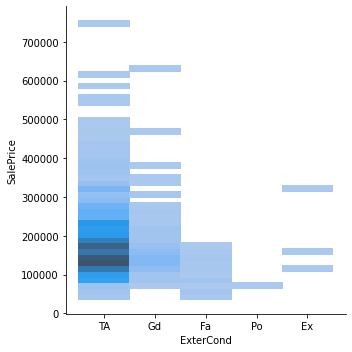

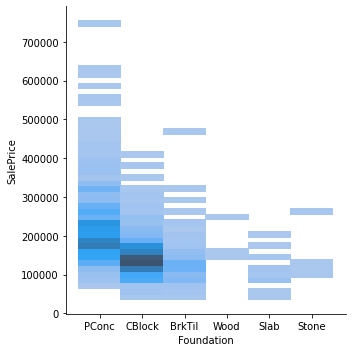

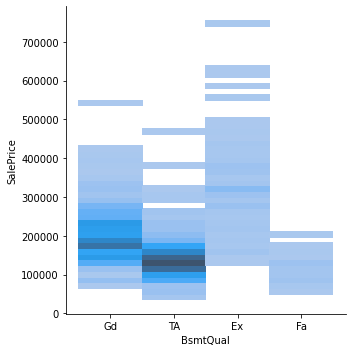

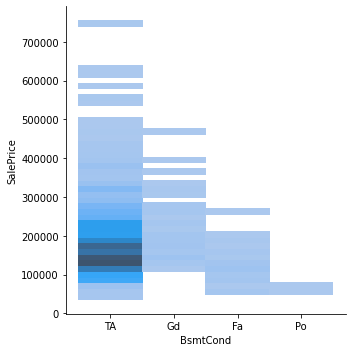

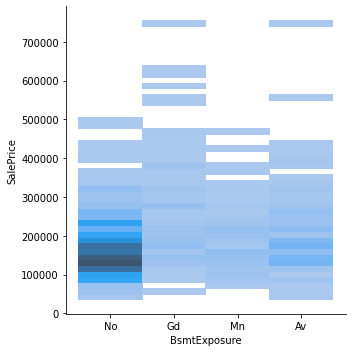

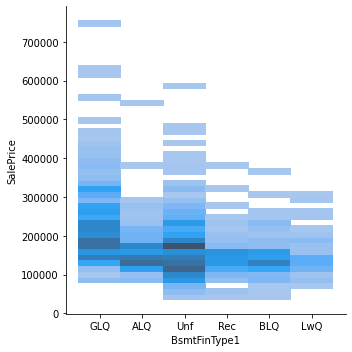

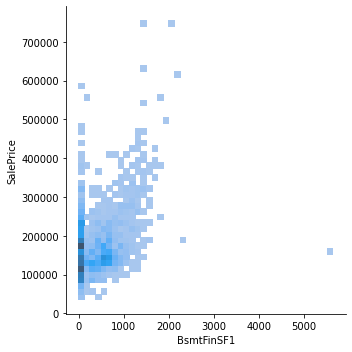

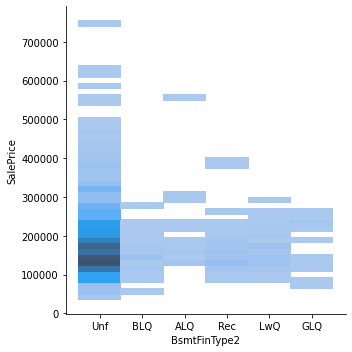

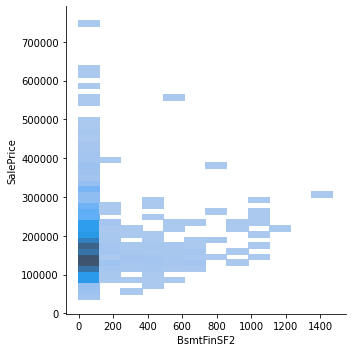

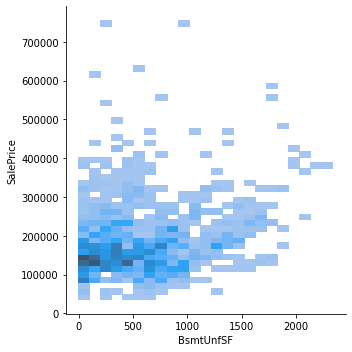

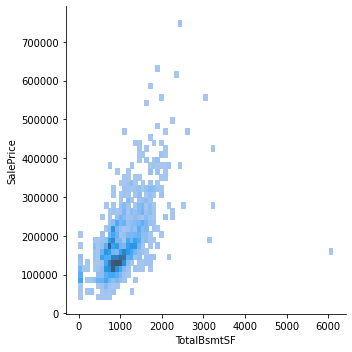

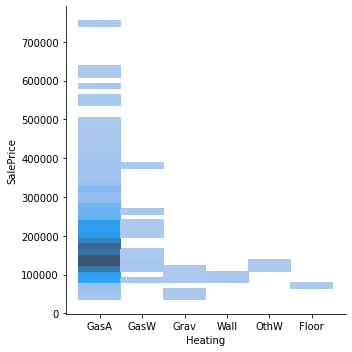

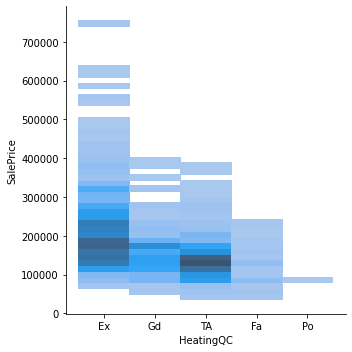

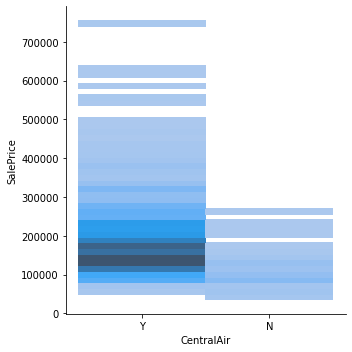

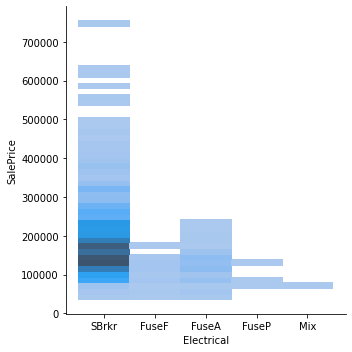

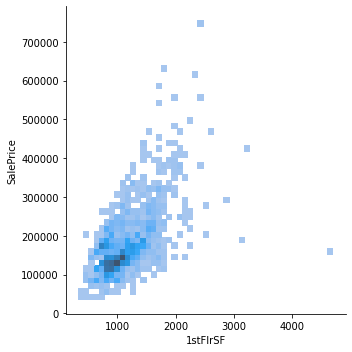

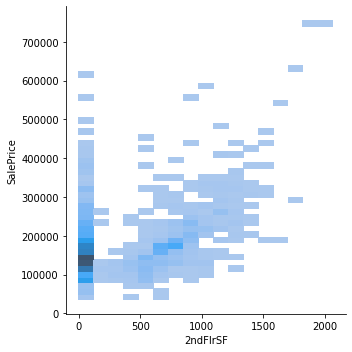

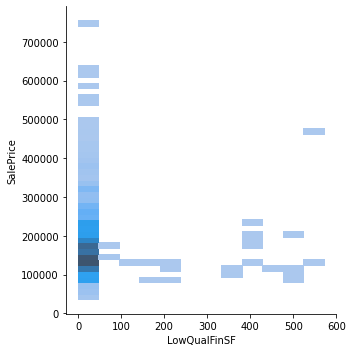

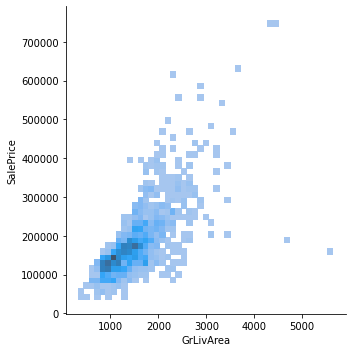

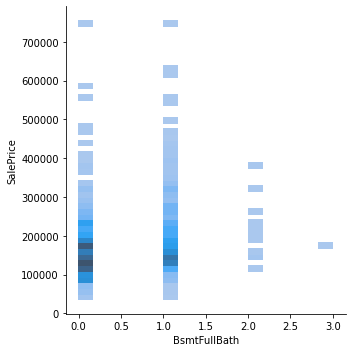

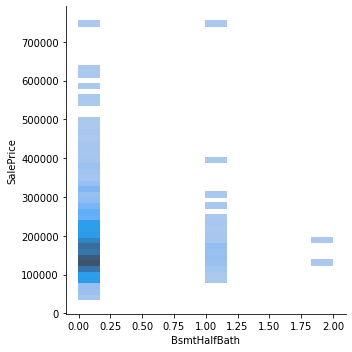

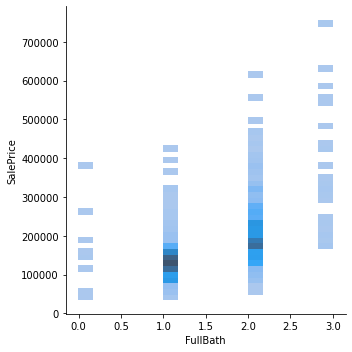

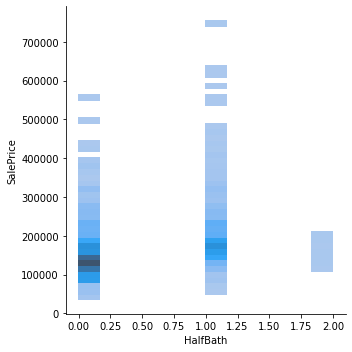

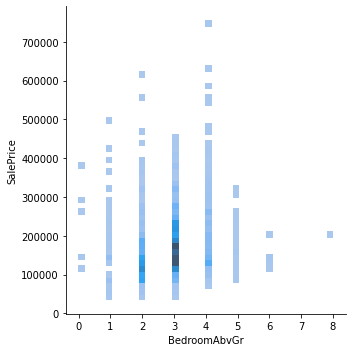

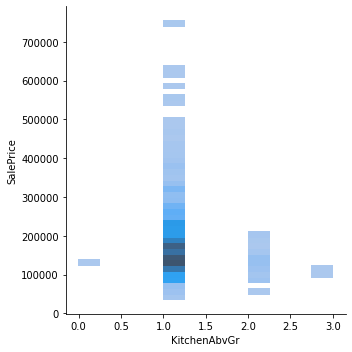

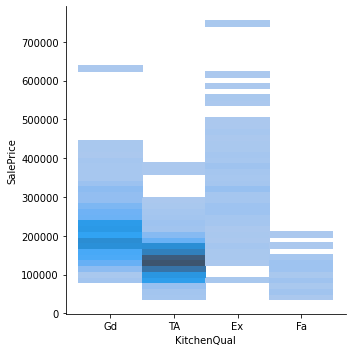

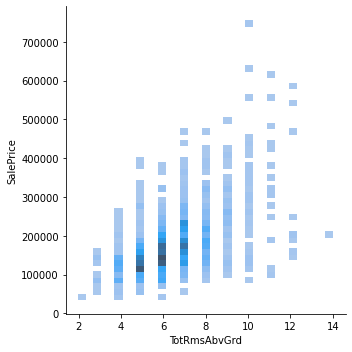

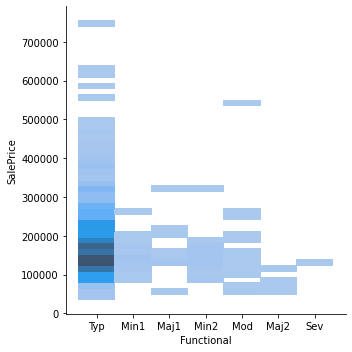

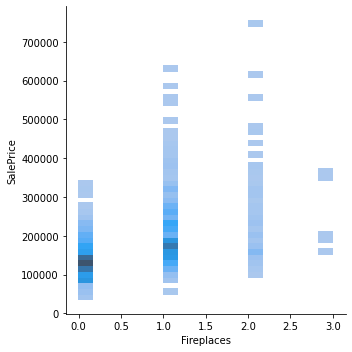

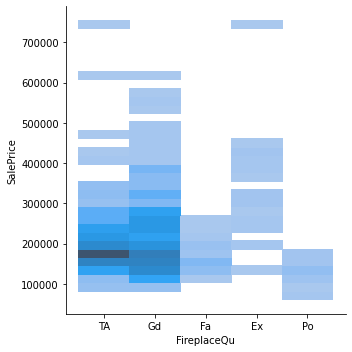

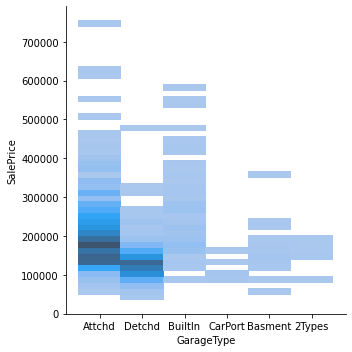

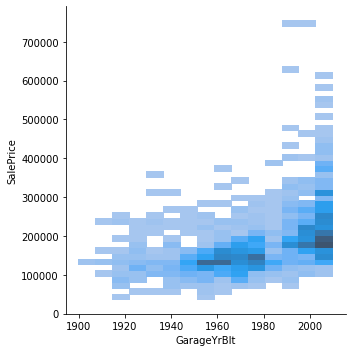

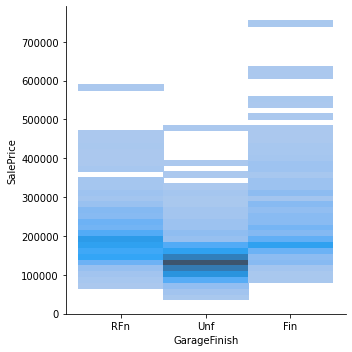

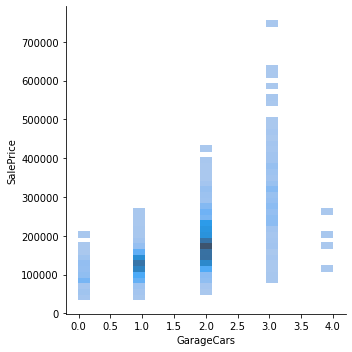

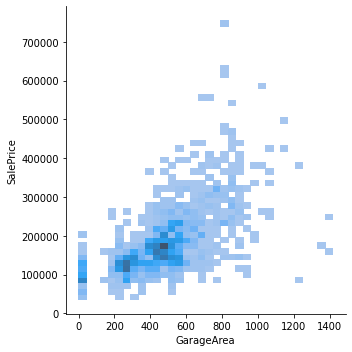

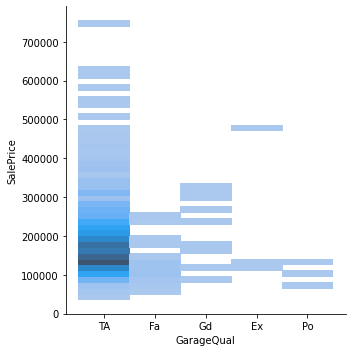

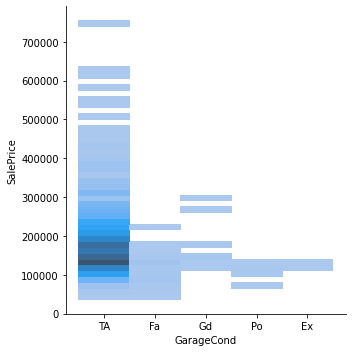

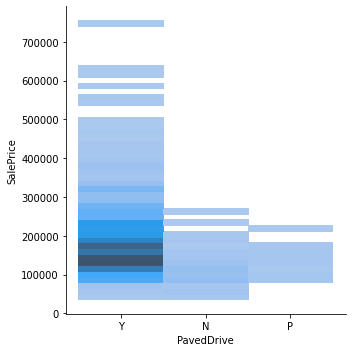

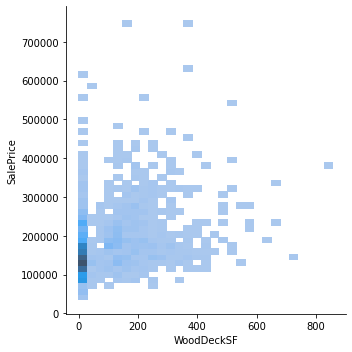

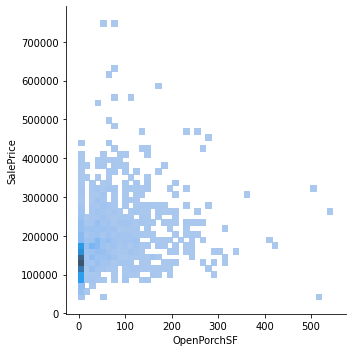

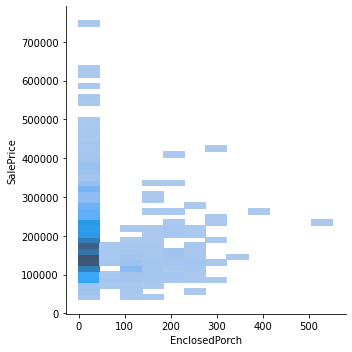

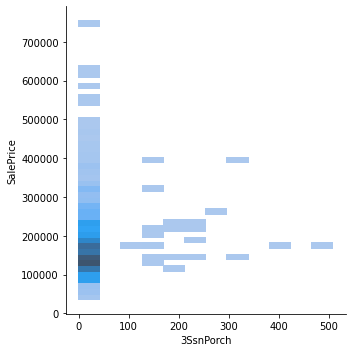

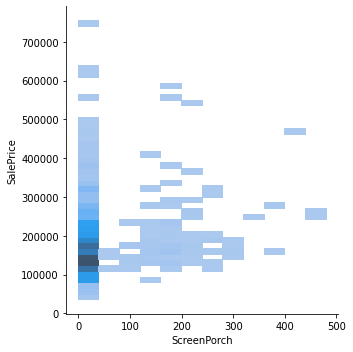

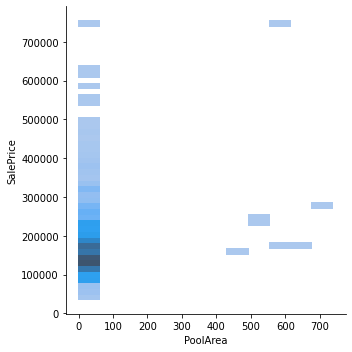

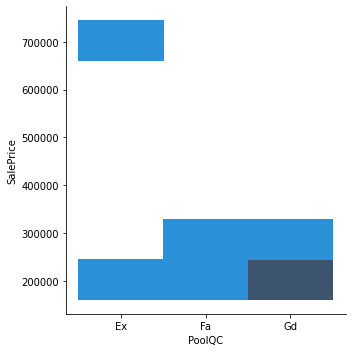

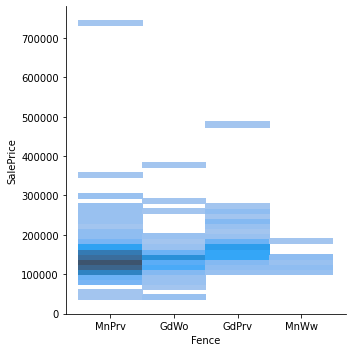

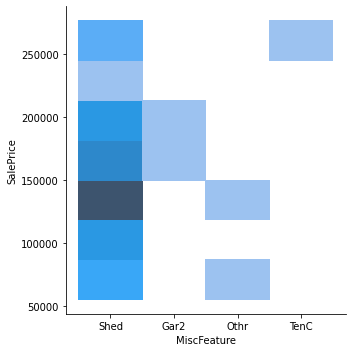

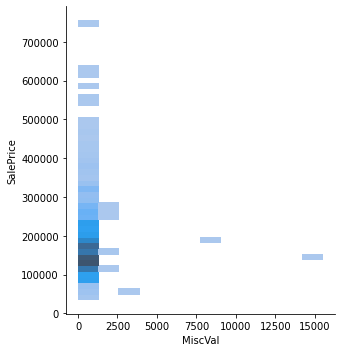

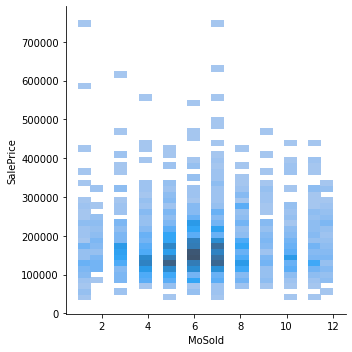

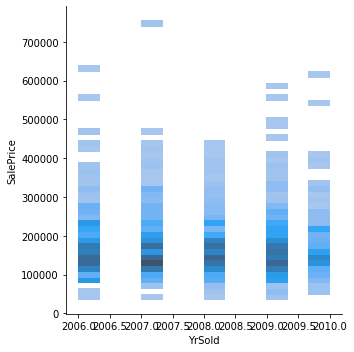

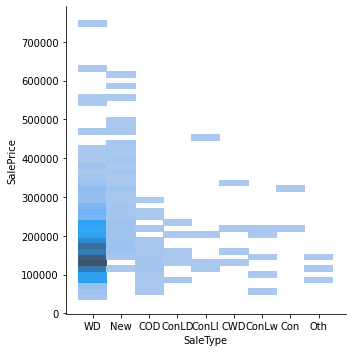

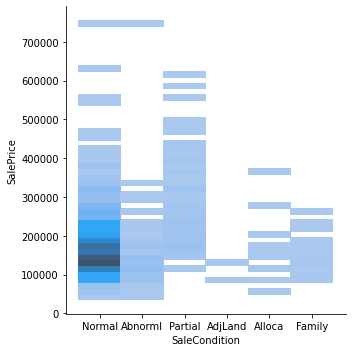

In [10]:
for string in train.columns:
  if string != 'Id' and string != 'SalePrice':
    ax = sns.displot(data = train, x = '{}'.format(string), y = 'SalePrice')

In [11]:
nullno = train.isnull()
nullno

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [12]:
#NULL값 개수 및 비율

nullno = train.isnull().sum().sort_values(ascending = False)
nullp = train.isnull().sum()/train.isnull().count()*100
nullpr = (round(nullp, 2)).sort_values(ascending = False)
nulldf = pd.concat([nullno, nullpr], axis = 1, keys = ['Number', 'Percent'])
pd.set_option('display.max_rows', 81)
nulldf

,Number,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


In [13]:
#NULL값의 비율이 40% 이상이면 해당 열을 삭제하기

data = [train, test]

for string in train.columns:
  if nulldf.loc['{}'.format(string)][1] > 40.0:
    train = train.drop(['{}'.format(string)], axis = 1)

nullno_t = test.isnull().sum().sort_values(ascending = False)
nullp_t = test.isnull().sum()/test.isnull().count()*100
nullpr_t = (round(nullp_t, 2)).sort_values(ascending = False)
nulldf_t = pd.concat([nullno_t, nullpr_t], axis = 1, keys = ['Number', 'Percent'])

for string in test.columns:
  if nulldf_t.loc['{}'.format(string)][1] > 40.0:
    test = test.drop(['{}'.format(string)], axis = 1)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [15]:
train['LotFrontage'].mode()

0    60.0
dtype: float64

In [16]:
#NULL값의 비율이 0~10%이면 최빈값으로 채우기

for string in train.columns:
  if nulldf.loc['{}'.format(string)][1] > 0 and nulldf.loc['{}'.format(string)][1] < 10.0:
    train['{}'.format(string)] = train['{}'.format(string)].fillna(train['{}'.format(string)].mode()[0])

for string in test.columns:
  if nulldf_t.loc['{}'.format(string)][1] > 0 and nulldf_t.loc['{}'.format(string)][1] < 10.0:
    test['{}'.format(string)] = test['{}'.format(string)].fillna(test['{}'.format(string)].mode()[0])

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [18]:
#문자 -> 숫자로 바꾸기

train['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [19]:
print(train['Street'].dtypes)

object


In [20]:
len(train['Street'].unique())

2

In [21]:
train['Street'].dtypes == 'object'

True

만약 라벨(SalePrice)인 경우 -> 예외처리해야 함!

만약 NULL값이 없고 float형인 경우 -> int로 변환

만약 NULL값이 없고 object형인 경우 -> dict(zip(key배열, 값배열)) 이용해서 dict만들고, .map으로 변환

In [22]:
data = [train, test]

for df in data:
  for string in test.columns:
    if df['{}'.format(string)].dtypes == 'float64' and df['{}'.format(string)].isnull().sum() == 0:
      df['{}'.format(string)] = df['{}'.format(string)].astype(int)

    if df['{}'.format(string)].dtypes == 'object' and df['{}'.format(string)].isnull().sum() == 0:
      convert_dict = dict(zip(df['{}'.format(string)].unique(), range(len(df['{}'.format(string)].unique()))))
      df['{}'.format(string)] = df['{}'.format(string)].map(convert_dict)

정수이지만 카테고리로 나누어야 하는 값들 변환하기
: MSSubClass, YearBuilt, YearRemodAdd, GarageYrBlt, MoSold, YrSold

In [23]:
cat = ['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

for df in data:
  for string in cat:
    convert_dict = dict(zip(df['{}'.format(string)].unique(), range(len(df['{}'.format(string)].unique()))))
    df['{}'.format(string)] = df['{}'.format(string)].map(convert_dict)

Normalize

자릿수의 최솟값 = 1, 자릿수의 최댓값 = 6이므로, 우선 자릿수 = 3으로 맞추기!

In [24]:
train.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000
mean,730.500000,3.131507,0.340411,70.049958,10516.828082,0.004110,0.408219,0.195205,0.000685,0.596575,0.062329,9.478082,0.383562,0.034247,0.444521,1.144521,6.099315,5.575342,37.732192,20.209589,0.267808,0.065068,2.203425,2.532192,0.803425,103.117123,0.720548,0.148630,0.726712,0.707534,0.110274,0.702055,1.722603,443.639726,0.333562,46.549315,567.240411,1057.429452,0.039041,0.854795,0.065068,0.156164,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,0.720548,6.517808,0.172603,0.613014,0.476712,30.893836,0.952055,1.767123,472.980137,0.066438,0.056164,0.102740,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.402055,1.829452,0.234932,0.35000,180921.195890
std,421.610009,3.599820,0.798309,24.284752,9981.264932,0.063996,0.582296,0.642010,0.026171,1.010359,0.276232,5.837783,1.208607,0.374191,1.068108,1.324754,1.382997,1.112799,28.380581,16.583514,0.611903,0.539603,2.507095,2.662342,0.628642,180.731373,0.574763,0.440222,0.831177,0.718939,0.409990,1.128907,1.474167,456.098091,1.020206,161.319273,441.866955,438.705324,0.306179,0.959501,0.246731,0.530363,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.706371,1.625393,0.717214,0.644666,0.803611,24.325057,0.726774,0.747315,213.804841,0.343904,0.332596,0.365201,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,3.632633,1.319577,0.804553,0.88787,79442.502883
min,1.000000,0.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,34900.000000
25%,365.750000,1.000000,0.000000,59.000000,7553.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0000

In [25]:
len(str(train['OverallQual'].max()))

#자릿수 2

2

In [26]:
train['OverallQual']*10

0       70
1       60
2       70
3       70
4       80
        ..
1455    60
1456    60
1457    70
1458    50
1459    50
Name: OverallQual, Length: 1460, dtype: int64

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int64  
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int64  
 6   LotShape       1459 non-null   int64  
 7   LandContour    1459 non-null   int64  
 8   Utilities      1459 non-null   int64  
 9   LotConfig      1459 non-null   int64  
 10  LandSlope      1459 non-null   int64  
 11  Neighborhood   1459 non-null   int64  
 12  Condition1     1459 non-null   int64  
 13  Condition2     1459 non-null   int64  
 14  BldgType       1459 non-null   int64  
 15  HouseStyle     1459 non-null   int64  
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [28]:
#라벨 제외하기!, Id 제외하기!
#LotFrontage는 float니까 다르게 자릿수를 세야 함! 따라서 제외시킴

target = 3
nums = [100, 10, 1, 1/10, 1/100, 1/1000]

for df in data:
  for string in test.columns:
    if string != 'LotFrontage' and string != 'Id':
      val = len(str(df['{}'.format(string)].max())) - 1
      df['{}'.format(string)] = df['{}'.format(string)] * nums[val]

In [29]:
#다시 int로 바꾸기!

data = [train, test]

for df in data:
  for string in test.columns:
    if df['{}'.format(string)].dtypes == 'float64' and df['{}'.format(string)].isnull().sum() == 0:
      df['{}'.format(string)] = df['{}'.format(string)].astype(int)

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int64  
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int64  
 6   LotShape       1459 non-null   int64  
 7   LandContour    1459 non-null   int64  
 8   Utilities      1459 non-null   int64  
 9   LotConfig      1459 non-null   int64  
 10  LandSlope      1459 non-null   int64  
 11  Neighborhood   1459 non-null   int64  
 12  Condition1     1459 non-null   int64  
 13  Condition2     1459 non-null   int64  
 14  BldgType       1459 non-null   int64  
 15  HouseStyle     1459 non-null   int64  
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [32]:
train.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,31.315068,34.041096,70.049958,10.055479,0.410959,40.821918,19.520548,0.068493,59.657534,6.232877,94.780822,38.356164,3.424658,44.452055,114.452055,60.993151,557.534247,37.732192,202.095890,26.780822,6.506849,22.034247,25.321918,80.342466,10.155479,72.054795,14.863014,72.671233,70.753425,11.027397,70.205479,172.260274,44.072603,33.356164,4.609589,56.345205,105.339726,3.904110,85.479452,6.506849,15.616438,115.836986,34.519863,5.844521,151.120548,42.534247,5.753425,156.506849,38.287671,286.643836,104.657534,72.054795,65.178082,17.260274,61.301370,47.671233,308.938356,95.205479,176.712329,46.953425,6.643836,5.616438,10.273973,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,0.430822,64.020548,182.945205,23.493151,35.000000,180921.195890
std,421.610009,35.998201,79.830859,24.284752,9.985408,6.399614,58.229614,64.201023,2.617120,101.035858,27.623246,58.377831,120.860675,37.419108,106.810773,132.475408,13.829965,111.279934,28.380581,165.835138,61.190328,53.960263,25.070952,26.623420,62.864176,17.949967,57.476256,44.022181,83.117720,71.893852,40.998996,112.890669,147.416735,45.473597,102.020556,16.035932,44.134585,43.841961,30.617884,95.950083,24.673119,53.036289,38.648955,43.464689,48.623081,52.544500,51.891061,23.875265,55.091580,50.288538,81.577804,22.033820,70.637145,16.253933,71.721422,64.466639,80.361086,243.250569,72.677371,74.731501,21.308704,34.390361,33.259579,36.520065,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,4.957808,36.326327,131.957726,80.455288,88.787044,79442.502883
min,1.000000,0.000000,0.000000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,10.000000,0

In [33]:
train['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [34]:
#LotFrontage 값 채우기

noLottrain = train.drop(['LotFrontage'], axis = 1)
noLottest = test.drop(['LotFrontage'], axis = 1)
noLottrain.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,0,0,8,0,0,0,0,0,0,0,0,0,0,0,70,500,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,70,0,0,15,85,0,0,0,0,85,85,0,171,100,0,200,100,300,100,0,80,0,0,0,0,0,200,54,0,0,0,0,61,0,0,0,0,0,0,0,0,0,208500
1,2,10,0,9,0,0,0,0,100,0,10,100,0,0,100,60,800,1,10,0,0,10,10,100,0,100,0,100,0,0,100,100,97,0,0,28,126,0,0,0,0,126,0,0,126,0,100,200,0,300,100,100,60,0,100,0,10,0,200,46,0,0,0,298,0,0,0,0,0,0,10,100,0,0,181500
2,3,0,0,11,0,100,0,0,0,0,0,0,0,0,0,70,500,2,20,0,0,0,0,0,16,0,0,0,0,0,200,0,48,0,0,43,92,0,0,0,0,92,86,0,178,100,0,200,100,300,100,0,60,0,100,0,20,0,200,60,0,0,0,0,42,0,0,0,0,0,20,0,0,0,223500
3,4,20,0,9,0,100,0,0,200,0,20,0,0,0,0,70,500,3,30,0,0,20,20,100,0,100,0,200,100,100,0,100,21,0,0,54,75,0,100,0,0,96,75,0,171,100,0,100,0,300,100,0,70,0,100,100,30,100,300,64,0,0,0,0,35,272,0,0,0,0,0,200,0,100,140000
4,5,0,0,14,0,100,0,0,100,0,30,0,0,0,0,80,500,4,40,0,0,0,0,0,35,0,0,0,0,0,300,0,65,0,0,49,114,0,0,0,0,114,105,0,219,100,0,200,100,400,100,0,90,0,100,0,40,0,300,83,0,0,0,192,84,0,0,0,0,0,30,0,0,0,250000


In [35]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knn_train = train[train.LotFrontage.notnull()]
knn_train['LotFrontage'].isnull().sum()

0

In [36]:
X_train = knn_train.drop(['LotFrontage'], axis = 1)
Y_train = knn_train.LotFrontage

knr.fit(X_train, Y_train)

pred_lot = knr.predict(noLottrain)
pred_lot

array([65.2, 68.8, 82.8, ..., 69. , 75.2, 69.8])

In [37]:
knn_test = test[test.LotFrontage.notnull()]

X_test = knn_test.drop(['LotFrontage'], axis = 1)
Y_test = knn_test.LotFrontage

knr.fit(X_test, Y_test)

pred_lot_t = knr.predict(noLottest)
pred_lot_t

array([67.4, 76.6, 70. , ..., 85.6, 70.6, 72.2])

In [38]:
slicelot = train['LotFrontage'].copy()
slicelot[np.isnan(slicelot)] = pred_lot
train['LotFrontage'] = slicelot.astype(int)

slicelot_t = test['LotFrontage'].copy()
slicelot_t[np.isnan(slicelot_t)] = pred_lot_t
test['LotFrontage'] = pred_lot_t.astype(int)

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   MSZoning       1460 non-null   int64
 3   LotFrontage    1460 non-null   int64
 4   LotArea        1460 non-null   int64
 5   Street         1460 non-null   int64
 6   LotShape       1460 non-null   int64
 7   LandContour    1460 non-null   int64
 8   Utilities      1460 non-null   int64
 9   LotConfig      1460 non-null   int64
 10  LandSlope      1460 non-null   int64
 11  Neighborhood   1460 non-null   int64
 12  Condition1     1460 non-null   int64
 13  Condition2     1460 non-null   int64
 14  BldgType       1460 non-null   int64
 15  HouseStyle     1460 non-null   int64
 16  OverallQual    1460 non-null   int64
 17  OverallCond    1460 non-null   int64
 18  YearBuilt      1460 non-null   int64
 19  YearRe

In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1459 non-null   int64
 1   MSSubClass     1459 non-null   int64
 2   MSZoning       1459 non-null   int64
 3   LotFrontage    1459 non-null   int64
 4   LotArea        1459 non-null   int64
 5   Street         1459 non-null   int64
 6   LotShape       1459 non-null   int64
 7   LandContour    1459 non-null   int64
 8   Utilities      1459 non-null   int64
 9   LotConfig      1459 non-null   int64
 10  LandSlope      1459 non-null   int64
 11  Neighborhood   1459 non-null   int64
 12  Condition1     1459 non-null   int64
 13  Condition2     1459 non-null   int64
 14  BldgType       1459 non-null   int64
 15  HouseStyle     1459 non-null   int64
 16  OverallQual    1459 non-null   int64
 17  OverallCond    1459 non-null   int64
 18  YearBuilt      1459 non-null   int64
 19  YearRe

In [41]:
train.to_csv('train_ppc.csv')
test.to_csv('test_ppc.csv')

In [42]:
X_train = train.drop(['SalePrice', 'Id'], axis = 1)
Y_train = train.SalePrice

X_test = test.drop(['Id'], axis = 1)

X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,0,65,8,0,0,0,0,0,0,0,0,0,0,0,70,500,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,70,0,0,15,85,0,0,0,0,85,85,0,171,100,0,200,100,300,100,0,80,0,0,0,0,0,200,54,0,0,0,0,61,0,0,0,0,0,0,0,0,0
1,10,0,80,9,0,0,0,0,100,0,10,100,0,0,100,60,800,1,10,0,0,10,10,100,0,100,0,100,0,0,100,100,97,0,0,28,126,0,0,0,0,126,0,0,126,0,100,200,0,300,100,100,60,0,100,0,10,0,200,46,0,0,0,298,0,0,0,0,0,0,10,100,0,0
2,0,0,68,11,0,100,0,0,0,0,0,0,0,0,0,70,500,2,20,0,0,0,0,0,16,0,0,0,0,0,200,0,48,0,0,43,92,0,0,0,0,92,86,0,178,100,0,200,100,300,100,0,60,0,100,0,20,0,200,60,0,0,0,0,42,0,0,0,0,0,20,0,0,0
3,20,0,60,9,0,100,0,0,200,0,20,0,0,0,0,70,500,3,30,0,0,20,20,100,0,100,0,200,100,100,0,100,21,0,0,54,75,0,100,0,0,96,75,0,171,100,0,100,0,300,100,0,70,0,100,100,30,100,300,64,0,0,0,0,35,272,0,0,0,0,0,200,0,100
4,0,0,84,14,0,100,0,0,100,0,30,0,0,0,0,80,500,4,40,0,0,0,0,0,35,0,0,0,0,0,300,0,65,0,0,49,114,0,0,0,0,114,105,0,219,100,0,200,100,400,100,0,90,0,100,0,40,0,300,83,0,0,0,192,84,0,0,0,0,0,30,0,0,0


Scikit-Learn 모델 이용한 예측

In [43]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [44]:
#Random Forest

from sklearn.model_selection import cross_val_score

RF = RandomForestRegressor(n_estimators=100)
rf = cross_val_score(RF, X_train, Y_train, cv = 10, scoring = 'neg_root_mean_squared_error')
rfm = rf.mean()

In [45]:
rfm

-29209.395473725097

In [46]:
#Stochastic Gradient Descent

SGD = linear_model.SGDRegressor(max_iter=5, tol=None)
sgd = cross_val_score(SGD, X_train, Y_train, cv = 10, scoring = 'neg_root_mean_squared_error')
sgdm = sgd.mean()

In [47]:
#Logistic Regression

LOGREG = LogisticRegression(max_iter=5)
logreg = cross_val_score(LOGREG, X_train, Y_train, cv = 10, scoring = 'neg_root_mean_squared_error')
lrm = logreg.mean()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

In [48]:
# K Nearest Neighbor

KNN = KNeighborsRegressor(n_neighbors = 3) 
knn = cross_val_score(KNN, X_train, Y_train, cv = 10, scoring = 'neg_root_mean_squared_error')
knnm = knn.mean()

In [49]:
#Gaussian Naive Bayes

G = GaussianNB() 
g = cross_val_score(G, X_train, Y_train, cv = 10, scoring = 'neg_root_mean_squared_error')
gm = g.mean()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


In [50]:
#Perceptron

P = Perceptron(max_iter=5)
p = cross_val_score(P, X_train, Y_train, cv = 10, scoring = 'neg_root_mean_squared_error')
pm = p.mean()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWar

In [51]:
#Linear Support Vector Machine

from sklearn.svm import LinearSVR

LSVR = LinearSVR()
lsvr = cross_val_score(LSVR, X_train, Y_train, cv = 10, scoring = 'neg_root_mean_squared_error')
lsvrm = lsvr.mean()

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

In [52]:
#Decision Tree

DT = DecisionTreeRegressor() 
dt = cross_val_score(DT, X_train, Y_train, cv = 10, scoring = 'neg_root_mean_squared_error')
dtm = dt.mean()

In [53]:
# cross-validation 결과

names = np.array(['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'])

scores = np.array([lsvrm, knnm, lrm, 
              rfm, gm, pm, 
              sgdm, dtm])

namess = pd.Series(names)
scoress = pd.Series(scores)

results = pd.concat([namess, scoress], keys = ['Model', 'Score'], axis = 1)
results_sorted = results.sort_values(ascending= False, by = 'Score')
results_sorted

,Model,Score
3,Random Forest,-2.920940e+04
0,Support Vector Machines,-3.384640e+04
7,Decision Tree,-3.961127e+04
1,KNN,-4.658550e+04
4,Naive Bayes,-5.937678e+04
2,Logistic Regression,-6.018518e+04
5,Perceptron,-7.868927e+04
6,Stochastic Gradient Decent,-8.932069e+14


In [56]:
# 가장 결과가 좋은 random forest 이용

RF.fit(X_train, Y_train)

RandomForestRegressor()

In [63]:
# Feature Importances

importances = pd.DataFrame({
    'feature':X_train.columns,
    'importance':np.round(RF.feature_importances_,3)})

importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
OverallQual,0.588
GrLivArea,0.107
TotalBsmtSF,0.038
2ndFlrSF,0.034
BsmtFinSF1,0.024
1stFlrSF,0.023
GarageCars,0.020
GarageArea,0.017
LotArea,0.009


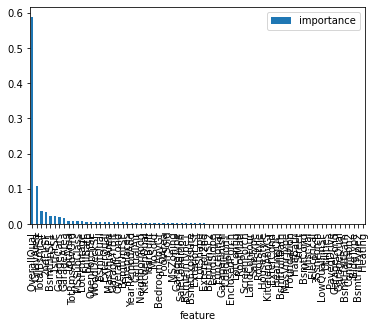

In [58]:
importances.plot.bar()

In [66]:
importances.loc['GrLivArea'][0]

0.107

In [67]:
# 중요도가 0.01보다 작으면 삭제

for string in X_train.columns:
  if importances.loc['{}'.format(string)][0] <= 0.01:
    X_train = X_train.drop(['{}'.format(string)], axis = 1)

In [72]:
# test도 똑같이 맞춰주기

for string in X_test.columns:
  if string not in X_train.columns:
    X_test = X_test.drop(['{}'.format(string)], axis = 1)


In [68]:
X_train

,OverallQual,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageCars,GarageArea
0,70,70,85,85,85,171,200,54
1,60,97,126,126,0,126,200,46
2,70,48,92,92,86,178,200,60
3,70,21,75,96,75,171,300,64
4,80,65,114,114,105,219,300,83
...,...,...,...,...,...,...,...,...
1455,60,0,95,95,69,164,200,46
1456,60,79,154,207,0,207,200,50
1457,70,27,115,118,115,234,100,25
1458,50,4,107,107,0,107,100,24


In [73]:
X_test.head()

,OverallQual,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageCars,GarageArea
0,50,46,88,89,0,89,100,73
1,60,92,132,132,0,132,100,31
2,50,79,92,92,70,162,200,48
3,60,60,92,92,67,160,200,47
4,80,26,128,128,0,128,200,50


In [70]:
# Hyperparameter Tuning w/ GridSearchCV

param_grid = { 
              "min_samples_leaf" : [1, 5, 10, 25, 50, 70], 
              "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], 
              "n_estimators": [100, 400, 700, 1000, 1500],
              "bootstrap": [True, False]
              }

from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestRegressor(n_estimators=100, max_features='auto', 
                            oob_score=True, random_state=1, n_jobs=-1)

clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)


print('best parameters : ', clf.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1200 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/

best parameters :  {'bootstrap': True, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 400}


In [71]:
rf_tuned = RandomForestRegressor(n_estimators= 400, bootstrap= True, min_samples_leaf= 1, 
                                 min_samples_split= 10, max_features= 'auto', random_state= 1, 
                                 n_jobs= -1, oob_score= True)

rf_tuned.fit(X_train, Y_train)

RandomForestRegressor(min_samples_split=10, n_estimators=400, n_jobs=-1,
                      oob_score=True, random_state=1)

In [75]:
pred = rf_tuned.predict(X_test)

In [76]:
pred

array([124813.02282489, 160650.1561971 , 162184.03255296, ...,
       156810.53674794, 102850.25978279, 234510.41932768])

In [78]:
sub_dict = {'Id': test.Id.values.tolist(), 'SalePrice': pred}
sub = pd.DataFrame(sub_dict)
sub.to_csv('Randomforestsub.csv', index = False)

제출결과: RMSE 0.16